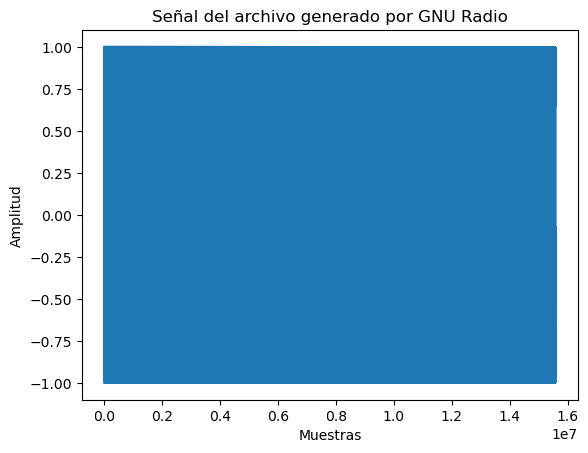

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft

filename = "TP1-1g-datos.bin"

# Cargar los datos del archivo en un arreglo NumPy
data = np.fromfile(filename, dtype=np.float32)

# Graficar la señal
plt.plot(data)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal del archivo generado por GNU Radio')
plt.show()


# Cargar el archivo generado por el file sink
#fs=10000
#data = np.fromfile(open('TP1-1g-datos.dat'), dtype=np.float32)
#N =len(data)
#t=np.linspace(0,N/fs,N)
#print(N)
#plt.plot(data)

# Definir la frecuencia de muestreo
#fs = 1000

# Aplicar diferentes ventanas a los datos
#rect_data = data * signal.windows.boxcar(len(data))
#hann_data = data * signal.windows.hann(len(data))
#hamming_data = data * signal.windows.hamming(len(data))
#blackman_data = data * signal.windows.blackman(len(data))

# Calcular la transformada de Fourier de los datos
#rect_fft = fft(rect_data)
#hann_fft = fft(hann_data)
#hamming_fft = fft(hamming_data)
#blackman_fft = fft(blackman_data)

# Calcular la potencia de la señal
#rect_power = np.sum(np.abs(rect_data)**2)/len(rect_data)
#hann_power = np.sum(np.abs(hann_data)**2)/len(hann_data)
#hamming_power = np.sum(np.abs(hamming_data)**2)/len(hamming_data)
#blackman_power = np.sum(np.abs(blackman_data)**2)/len(blackman_data)